<a href="https://colab.research.google.com/github/rehman2222/AI/blob/main/Final_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME:   ABDUR REHMAN

REG_NO:SP23-BSE-123

COLLAB LINK:https://colab.research.google.com/drive/1alneUTUYaAsC4BARnDCr4Ci687T4TcV7?usp=sharing


ML Model Results (Diabetes):
      Metric     Score
0   Accuracy  0.719101
1  Precision  0.718750
2     Recall  0.589744
3   F1-Score  0.647887
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8977 - loss: 0.3405 - val_accuracy: 0.9804 - val_loss: 0.0678
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9816 - loss: 0.0624 - val_accuracy: 0.9810 - val_loss: 0.0610
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9896 - loss: 0.0341 - val_accuracy: 0.9828 - val_loss: 0.0573
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9934 - loss: 0.0223 - val_accuracy: 0.9860 - val_loss: 0.0510
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9958 - loss: 0.0151 - val_accuracy: 0.9849 - val_loss: 0.0591


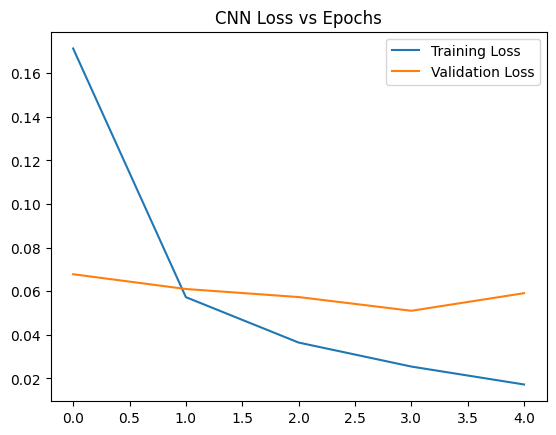

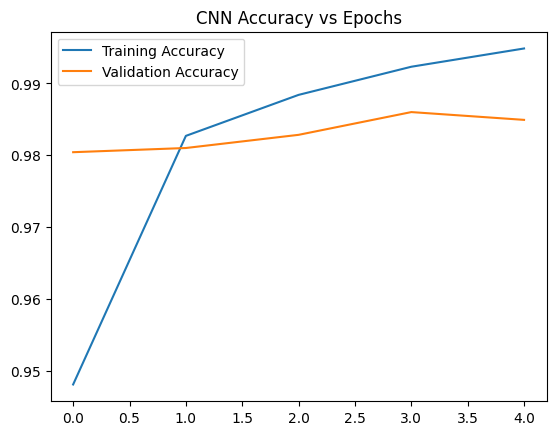

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.7046 - loss: 0.8705 - val_accuracy: 0.9495 - val_loss: 0.1678
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9527 - loss: 0.1567 - val_accuracy: 0.9640 - val_loss: 0.1203
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9659 - loss: 0.1089 - val_accuracy: 0.9712 - val_loss: 0.0982
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9747 - loss: 0.0809 - val_accuracy: 0.9717 - val_loss: 0.0935
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9796 - loss: 0.0665 - val_accuracy: 0.9756 - val_loss: 0.0777
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9722 - loss: 0.0864

Hybrid Model Accuracy: 0.9779000282287598
Hybrid Model Loss: 0.07200300693511963
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


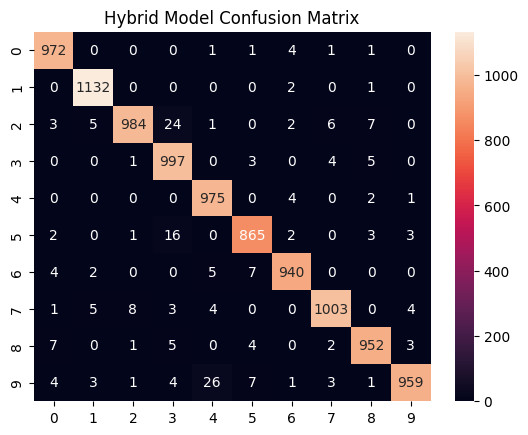

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9810 - loss: 0.0611

Model Comparison:
                 Model  Accuracy
0                  CNN    0.9839
1  CNN + LSTM (Hybrid)    0.9779


In [1]:


# -------- IMPORT LIBRARIES --------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM

# =========================================
# QUESTION 1: MACHINE LEARNING (DIABETES)
# Model: Logistic Regression
# =========================================

# Load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Preprocessing
X = np.nan_to_num(X)
y = np.where(y > y.mean(), 1, 0)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
ml_model = LogisticRegression()
ml_model.fit(X_train, y_train)

# Predict & evaluate
y_pred = ml_model.predict(X_test)

ml_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

print("\nML Model Results (Diabetes):")
print(ml_results)

# =========================================
# QUESTION 2: DEEP LEARNING (MNIST - CNN)
# =========================================

# Load MNIST
(X_train_dl, y_train_dl), (X_test_dl, y_test_dl) = tf.keras.datasets.mnist.load_data()

# Normalize & reshape
X_train_dl = X_train_dl / 255.0
X_test_dl = X_test_dl / 255.0

X_train_dl = X_train_dl.reshape(-1, 28, 28, 1)
X_test_dl = X_test_dl.reshape(-1, 28, 28, 1)

# CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train CNN
cnn_history = cnn_model.fit(
    X_train_dl, y_train_dl,
    epochs=5,
    validation_split=0.2
)

# Plot Loss
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("CNN Loss vs Epochs")
plt.show()

# Plot Accuracy
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("CNN Accuracy vs Epochs")
plt.show()

# Save model
cnn_model.save("mnist_cnn_model.h5")

# =========================================
# QUESTION 3: HYBRID MODEL (CNN + LSTM)
# =========================================

# Reshape for LSTM
X_train_h = X_train_dl.reshape(-1, 28, 28)
X_test_h = X_test_dl.reshape(-1, 28, 28)

# Hybrid model
hybrid_model = Sequential([
    LSTM(64, input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

hybrid_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train hybrid model
hybrid_history = hybrid_model.fit(
    X_train_h, y_train_dl,
    epochs=5,
    validation_split=0.2
)

# Evaluate hybrid model
hybrid_loss, hybrid_accuracy = hybrid_model.evaluate(X_test_h, y_test_dl)
print("\nHybrid Model Accuracy:", hybrid_accuracy)
print("Hybrid Model Loss:", hybrid_loss)

# Confusion Matrix
y_pred_h = np.argmax(hybrid_model.predict(X_test_h), axis=1)
cm = confusion_matrix(y_test_dl, y_pred_h)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Hybrid Model Confusion Matrix")
plt.show()

# =========================================
# FINAL COMPARISON
# =========================================

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_dl, y_test_dl)

comparison = pd.DataFrame({
    "Model": ["CNN", "CNN + LSTM (Hybrid)"],
    "Accuracy": [cnn_accuracy, hybrid_accuracy]
})

print("\nModel Comparison:")
print(comparison)
